In [1]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
# Name - Rev.get_R_est
#__author__ = 'Prakhar MISRA'
# Created 8/18/2019
# Last edit 8/18/2010

# code to answer reviwer commment regarding plotting the uncerstainty in the Restimates

# Function to multiply the cities with corresponding beta to find the Rest
# also known as get beta


# Important resource

# following course by PSU teaches statistics with derived examples
# Confidence interval -  https://newonlinecourses.science.psu.edu/stat414/node/297/
# prediction interval - https://newonlinecourses.science.psu.edu/stat414/node/298/
# CI for Multi linear regression https://newonlinecourses.science.psu.edu/stat501/lesson/7/7.1

# for bayesian 
# More advanced , posterioir predictive distribution for Bayesian 
# https://baezortega.github.io/2018/08/06/robust_regression/

import pandas as pd
import os
import scipy as sp
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np
from datetime import timedelta, date
import matplotlib.dates as mdates

currdir = os.getcwd()
import seaborn as sns
sns.set_style("whitegrid")

In [11]:


#data = pd.read_csv(r"C:\Users\prakhar\Google Drive\AQM_Research\Docs\Excel\AQmodel\fitmodel\Model_city_tier\fullfire1500km\allAY20180124ff1500kmmodified.csv", header = 0)
#beta = pd.read_csv(r"C:\Users\prakhar\Google Drive\AQM_Research\Docs\Excel\AQmodel\fitmodel\Model_city_tier\fullfire1500km\allbeta.csv", header = 0)
#joined.to_csv(r"C:\Users\prakhar\Google Drive\AQM_Research\Docs\Excel\AQmodel\fitmodel\Model_city_tier\fullfire1500km\allAY20180124ff1500kmmodifiedfit.csv", header = True)

datapath = r"C:\Users\prakhar\Google Drive\AQM_Research\Docs\Excel\AQmodel\fitmodel\Model_city_tier\correctUM20180206\allAY20180204I2set.csv"
betapath = r"C:\Users\prakhar\Google Drive\AQM_Research\Docs\Excel\AQmodel\fitmodel\Model_city_tier\correctUM20180206\allbeta20012011.csv"
outpath =  r"C:\Users\prakhar\Google Drive\AQM_Research\Docs\Excel\AQmodel\fitmodel\Model_city_tier\correctUM20180206\allAY20180204I2setfit.csv"

#In Thesis
# I regular data
datapath = r"C:\Users\prakhar\Google Drive\AQM_Research\Docs\Excel\AQmodel\fitmodel\Model_city_tier\IDW20180210\allAY20180210IDWset.csv"
betapath = r"C:\Users\prakhar\Google Drive\AQM_Research\Docs\Excel\AQmodel\fitmodel\Model_city_tier\IDW20180210\allbeta20012011.csv"
outpath =  r"C:\Users\prakhar\Google Drive\AQM_Research\Docs\Excel\AQmodel\fitmodel\Model_city_tier\IDW20180210\allAY20180210IDWsetfit.csv"

# II only central pixel beta
datapath = r"C:\Users\prakhar\Google Drive\AQM_Research\Docs\Excel\AQmodel\fitmodel\Model_city_tier\IDW20180210\allAY20180210IDWset.csv"
betapath = r"C:\Users\prakhar\Google Drive\AQM_Research\Docs\Excel\AQmodel\fitmodel\Model_city_tier\IDW20180210\allbetacentralpixel20012011.csv"
outpath =  r"C:\Users\prakhar\Google Drive\AQM_Research\Docs\Excel\AQmodel\fitmodel\Model_city_tier\IDW20180210\allAY20180210IDWsetcentralpixelfit.csv"


#In Thesis final
# I regular data
datapath = r"C:\Users\prakhar\Google Drive\AQM_Research\Docs\Excel\AQmodel\fitmodel\Model_city_tier\IDW20180212\allAY20180212IDW2set.csv"
betapath = r"C:\Users\prakhar\Google Drive\AQM_Research\Docs\Excel\AQmodel\fitmodel\Model_city_tier\IDW20180212\allbeta20012011.csv"
outpath =  r"C:\Users\prakhar\Google Drive\AQM_Research\Docs\Excel\AQmodel\fitmodel\Model_city_tier\IDW20180212\allAY20180212IDW2setfit.csv"

# II only central pixel beta
datapath = r"C:\Users\prakhar\Google Drive\AQM_Research\Docs\Excel\AQmodel\fitmodel\Model_city_tier\IDW20180212\allAY20180212IDW2set.csv"
betapath = r"C:\Users\prakhar\Google Drive\AQM_Research\Docs\Excel\AQmodel\fitmodel\Model_city_tier\IDW20180212\allbeta20012011centralpixel.csv"
outpath =  r"C:\Users\prakhar\Google Drive\AQM_Research\Docs\Excel\AQmodel\fitmodel\Model_city_tier\IDW20180212\allAY20180212IDW2setcentralpixelfit.csv"


# some argument for plitting
yearsFmt = mdates.DateFormatter('%Y')
years = mdates.YearLocator()   # eyery year
months = mdates.MonthLocator()  # every month

# for the reviewer comment 20190819
datapath = os.path.join(currdir, "lib", "AQmodel", "fitmodel", "Model_city_tier", "IDW20180212", "allAY20180212IDW2set.csv" )
betapath = os.path.join(currdir, "lib", "AQmodel", "fitmodel", "Model_city_tier", "IDW20180212", "allbeta20012011centralpixel.csv" )
outpath = os.path.join(currdir, "lib", "AQmodel", "fitmodel", "Model_city_tier", "IDW20180212", "allAY20180212IDW2setcentralpixelfit_20190819.csv" )


# experiment with simple addition of meterology  wind and PBL
datapath = os.path.join(currdir, "my_bayesian",  "HBM_city_tier_20180116","report20180212_IDW2_20190814", "meteorology_model", 'allAY20180212IDW2setclean_meteor.csv')
betapath = os.path.join(currdir, "my_bayesian",  "HBM_city_tier_20180116","report20180212_IDW2_20190814", "meteorology_model", 'allAY20180212IDW2setclean20012011_meteor__simplemeteor_wnd_pbl_betaFormatC.csv')
outpath = os.path.join(currdir, "my_bayesian",  "HBM_city_tier_20180116","report20180212_IDW2_20190814", "meteorology_model", 'allAY20180212IDW2setclean_meteorfit.csv')


# experiment with simple addition of meterology RH and PBL
datapath = os.path.join(currdir, "my_bayesian",  "HBM_city_tier_20180116","report20180212_IDW2_20190814", "meteorology_model", 'allAY20180212IDW2setclean_meteor.csv')
betapath = os.path.join(currdir, "my_bayesian",  "HBM_city_tier_20180116","report20180212_IDW2_20190814", "meteorology_model", 'allAY20180212IDW2setclean20012011_meteor__simplemeteor_rh_pbl_betaFormatC.csv')
outpath = os.path.join(currdir, "my_bayesian",  "HBM_city_tier_20180116","report20180212_IDW2_20190814", "meteorology_model", 'allAY20180212IDW2setclean_rh_pbl_meteorfit.csv')

# experiment with simple addition of meterology wnd and PBL, and s,r is simplified as shown in Rev.undo_s_r.ipynb
datapath = os.path.join(currdir, "my_bayesian",  "HBM_city_tier_20180116","report20180212_IDW2_20190814", "meteorology_model", "s_r_fromREASmodel", 'allAY20180212IDW2setclean_meteor_sr.csv')
betapath = os.path.join(currdir, "my_bayesian",  "HBM_city_tier_20180116","report20180212_IDW2_20190814", "meteorology_model", "s_r_fromREASmodel",  'allAY20180212IDW2setclean20012011_meteor_wdpbl_sr_betaformatC.csv')
outpath = os.path.join(currdir, "my_bayesian",  "HBM_city_tier_20180116","report20180212_IDW2_20190814", "meteorology_model", "s_r_fromREASmodel",  'allAY20180212IDW2setclean_wdpbl_meteor_srfit.csv')

# experiment with simple addition of meterology rhum and PBL, and s,r is simplified as shown in Rev.undo_s_r.ipynb
datapath = os.path.join(currdir, "my_bayesian",  "HBM_city_tier_20180116","report20180212_IDW2_20190814", "meteorology_model", "s_r_fromREASmodel", 'allAY20180212IDW2setclean_meteor_sr.csv')
betapath = os.path.join(currdir, "my_bayesian",  "HBM_city_tier_20180116","report20180212_IDW2_20190814", "meteorology_model", "s_r_fromREASmodel",  'allAY20180212IDW2setclean20012011_meteor_rhpbl_sr_betaformatC.csv')
outpath = os.path.join(currdir, "my_bayesian",  "HBM_city_tier_20180116","report20180212_IDW2_20190814", "meteorology_model", "s_r_fromREASmodel",  'allAY20180212IDW2setclean_rhpbl_meteor_srfit.csv')

# 10 aprameter experiment with simple addition of meterology wd, rhum and PBL, and s,r is simplified as shown in Rev.undo_s_r.ipynb
datapath = os.path.join(currdir, "my_bayesian",  "HBM_city_tier_20180116","report20180212_IDW2_20190814", "meteorology_model", "s_r_fromREASmodel", 'allAY20180212IDW2setclean_meteor_sr.csv')
betapath = os.path.join(currdir, "my_bayesian",  "HBM_city_tier_20180116","report20180212_IDW2_20190814", "meteorology_model", "s_r_fromREASmodel",  'allAY20180212IDW2setclean20012011_meteor_wdrhpbl_sr_betaformatC.csv')
outpath = os.path.join(currdir, "my_bayesian",  "HBM_city_tier_20180116","report20180212_IDW2_20190814", "meteorology_model", "s_r_fromREASmodel",  'allAY20180212IDW2setclean_wdrhpbl_meteor_srfit.csv')

# 10 aprameter SO2 aerosol beta corrected experiment with simple addition of meterology wd, rhum and PBL, and s,r is simplified as shown in Rev.undo_s_r.ipynb
datapath = os.path.join(currdir, "my_bayesian",  "HBM_city_tier_20180116","report20180212_IDW2_20190814", "meteorology_model", "s_r_fromREASmodel", "sulphate_aerosol_correction", 'allAY20180212IDW2setclean_meteor_sr.csv')
betapath = os.path.join(currdir, "my_bayesian",  "HBM_city_tier_20180116","report20180212_IDW2_20190814", "meteorology_model", "s_r_fromREASmodel", "sulphate_aerosol_correction",  'beta_norainformatC.csv')
#outpath = os.path.join(currdir, "my_bayesian",  "HBM_city_tier_20180116","report20180212_IDW2_20190814", "meteorology_model", "s_r_fromREASmodel", "sulphate_aerosol_correction",  'allAY20180212IDW2setclean_norain_srfit.csv')
outpath = os.path.join(currdir, "my_bayesian",  "HBM_city_tier_20180116","report20180212_IDW2_20190814", "meteorology_model", "s_r_fromREASmodel", "sulphate_aerosol_correction", "incorrect sr", 'wdrhpbl_srfit.csv')

# 10 aprameter SO2 aerosol beta corrected experiment with simple addition of meterology wd, rhum and PBL, and s,r is simplified as shown in Rev.undo_s_r.ipynb
datapath = os.path.join(currdir, "my_bayesian",  "HBM_city_tier_20180116","report20180212_IDW2_20190814", "meteorology_model", "s_r_fromREASmodel", "sulphate_aerosol_correction", 'allAY20180212IDW2setclean_sr2.csv')
betapath = os.path.join(currdir, "my_bayesian",  "HBM_city_tier_20180116","report20180212_IDW2_20190814", "meteorology_model", "s_r_fromREASmodel", "sulphate_aerosol_correction",  'beta_formatC.csv')
#outpath = os.path.join(currdir, "my_bayesian",  "HBM_city_tier_20180116","report20180212_IDW2_20190814", "meteorology_model", "s_r_fromREASmodel", "sulphate_aerosol_correction",  'allAY20180212IDW2setclean_norain_srfit.csv')
outpath = os.path.join(currdir, "my_bayesian",  "HBM_city_tier_20180116","report20180212_IDW2_20190814", "meteorology_model", "s_r_fromREASmodel", "sulphate_aerosol_correction",  'wdrhpbl_srfit.csv')


# SUBMITTED
# Reverting to our original SEA; 10 aprameter SO2 aerosol beta corrected experiment with simple addition of meterology wd, rhum and PBL, and s,r is simplified as shown in Rev.undo_s_r.ipynb
datapath = os.path.join(currdir, "my_bayesian",  "HBM_city_tier_20180116","report20180212_IDW2_20190814", "meteorology_model",  "SO2_crctn", "wnd_le0",  'allAY20180212IDW2setclean_meteor.csv')
betapath = os.path.join(currdir, "my_bayesian",  "HBM_city_tier_20180116","report20180212_IDW2_20190814", "meteorology_model",  "SO2_crctn", "wnd_le0",  'beta_formatC.csv')
outpath = os.path.join(currdir, "my_bayesian",  "HBM_city_tier_20180116","report20180212_IDW2_20190814", "meteorology_model",  "SO2_crctn",  "wnd_le0", 'wdrhpbl_srfit.csv')
# changes to kolkata strange V population
#datapath = os.path.join(currdir, "my_bayesian",  "HBM_city_tier_20180116","report20180212_IDW2_20190814", "meteorology_model",  "SO2_crctn", "wnd_le0",  'allAY20180212IDW2setclean_meteor_KolkataV.csv')
#outpath = os.path.join(currdir, "my_bayesian",  "HBM_city_tier_20180116","report20180212_IDW2_20190814", "meteorology_model",  "SO2_crctn",  "wnd_le0", 'wdrhpbl_srfit_KolkataV.csv')

# No rain case-- Reverting to our original SEA; 10 aprameter SO2 aerosol beta corrected experiment with simple addition of meterology wd, rhum and PBL, and s,r is simplified as shown in Rev.undo_s_r.ipynb
datapath = os.path.join(currdir, "my_bayesian",  "HBM_city_tier_20180116","report20180212_IDW2_20190814", "meteorology_model",  "SO2_crctn", "no_rain", 'allAY20180212IDW2setclean_meteor.csv')
betapath = os.path.join(currdir, "my_bayesian",  "HBM_city_tier_20180116","report20180212_IDW2_20190814", "meteorology_model",  "SO2_crctn",  "no_rain", 'beta_formatC.csv')
outpath = os.path.join(currdir, "my_bayesian",  "HBM_city_tier_20180116","report20180212_IDW2_20190814", "meteorology_model",  "SO2_crctn",  "no_rain", 'wdrhpbl_srfit.csv')


In [12]:


# theorey for PI # https://newonlinecourses.science.psu.edu/stat414/node/298/
# https://newonlinecourses.science.psu.edu/stat501/lesson/7/7.1

%matplotlib inline


def getR_est(data, beta):
    # get the Rest by multiply the X with its beta

    #data = pd.read_csv(datapath, header=0)
    #beta = pd.read_csv(betapath, header=0)

    joined = pd.merge(data, beta, how="left", on =["cityID2"])
    
    # predicted the R
    # original 7 predictor case
    #joined["R_est"] = joined.beta1 +joined.beta2*joined.AR +joined.beta3*joined.AC +joined.beta4*joined.AI + joined.beta5*joined.AF +joined.beta6*joined.ABK +joined.beta7*joined.AV
    # 9 predictor case
    joined["R_est"] = joined.beta1 +joined.beta2*joined.AR +joined.beta3*joined.AC +joined.beta4*joined.AI + joined.beta5*joined.AF +joined.beta6*joined.ABK +joined.beta7*joined.AV + joined.beta8*joined.wnd + joined.beta9*joined.rhum + joined.beta10*joined.hpbl

    # also get their uncertainty
    # 7 predictor case
    #joined["R_est_2sdevL"] = joined.beta1-2*joined.beta1sd +(joined.beta2-2*joined.beta2sd)*joined.AR +(joined.beta3-2*joined.beta3sd)*joined.AC + (joined.beta4-2*joined.beta4sd)*joined.AI + (joined.beta5-2*joined.beta5sd)*joined.AF +(joined.beta6-2*joined.beta7sd)*joined.ABK +(joined.beta7-2*joined.beta7sd)*joined.AV     
    #joined["R_est_2sdevU"] = joined.beta1+2*joined.beta1sd +(joined.beta2+2*joined.beta2sd)*joined.AR +(joined.beta3+2*joined.beta3sd)*joined.AC + (joined.beta4+2*joined.beta4sd)*joined.AI + (joined.beta5+2*joined.beta5sd)*joined.AF +(joined.beta6+2*joined.beta7sd)*joined.ABK +(joined.beta7+2*joined.beta7sd)*joined.AV     
    # 9 predictor case
    joined["R_est_2sdevL"] = joined.beta1-2*joined.beta1sd +(joined.beta2-2*joined.beta2sd)*joined.AR +(joined.beta3-2*joined.beta3sd)*joined.AC + (joined.beta4-2*joined.beta4sd)*joined.AI + (joined.beta5-2*joined.beta5sd)*joined.AF +(joined.beta6-2*joined.beta7sd)*joined.ABK +(joined.beta7-2*joined.beta7sd)*joined.AV + (joined.beta8-2*joined.beta8sd)*joined.wnd + (joined.beta9-2*joined.beta9sd)*joined.rhum  + (joined.beta10-2*joined.beta10sd)*joined.hpbl         
    joined["R_est_2sdevU"] = joined.beta1+2*joined.beta1sd +(joined.beta2+2*joined.beta2sd)*joined.AR +(joined.beta3+2*joined.beta3sd)*joined.AC + (joined.beta4+2*joined.beta4sd)*joined.AI + (joined.beta5+2*joined.beta5sd)*joined.AF +(joined.beta6+2*joined.beta7sd)*joined.ABK +(joined.beta7+2*joined.beta7sd)*joined.AV + (joined.beta8+2*joined.beta8sd)*joined.wnd + (joined.beta9+2*joined.beta9sd)*joined.rhum + (joined.beta10+2*joined.beta10sd)*joined.hpbl                 
    
    
    
    return joined




def get_MSE(y, yhat):
    # get the mean squared error
    
    mse = ((y - yhat)**2).mean(axis=0)
    return mse

def get_X_dot_sq_diff(X):
    # get the standard deviation of multi variable X form its mean. X is the set of predictors on which the mode was oritgically trained
    
    # get the mean of X
    #X_mean = np.mean(X, axis =0 )
    
    # get the sqaure of the differences
    #X_diff_sq = (X - X_mean)**2
    
    # get the sum of X_diff_sq
    #X_sum_diff_sq = X_diff_sq.sum(axis = 1)
    
    # basically get X'X
    X_dot_sq_diff =  np.dot(np.transpose((X - X.mean(axis=0))), (X - X.mean(axis=0)))
    
    return X_dot_sq_diff
    

def get_Xdiff_dist(Xx, Xo):
    # find the distance of the new predictor Xx from X. X is the set of predictors on which the mode was oritgically trained
    # size of X is 7x1 (EA and 6ECs)
    
    print("d")
    
    
def get_onetime_calc(X,Y):
    # calculate the dunctions that are needed for one time only    
    
    # get X*'X*. X* denotes X-Xmean
    X_dot_sq_diff = get_X_dot_sq_diff(X)
    
    # get mean of X
    Xm = X.mean(axis=0)

    # get the MSE
    MSE = get_MSE(Y[:,0], Y[:,1])
    
    return [X_dot_sq_diff, Xm, MSE]



def get_CI(Xh, t, Xm,  X_dot_sq_diff, MSE):
    # get confidence interval, predcition interval
    
    # calculate the standard error
    se = (MSE*  np.dot(  np.dot(np.transpose(Xh-Xm),np.linalg.pinv(X_dot_sq_diff)) ,   (Xh-Xm) )  )
    
    # calculate the confidence interavl
    CI = t*np.sqrt(se)
    
    #calculate the prediction interval
    PI = t*np.sqrt(MSE + se)
    
    return [CI, PI]

def get_CI_all(X, Y, Xall):   
    # call all the previous functions
    
    # first make the one time calculations
    [X_dot_sq_diff, Xm, MSE] = get_onetime_calc(X,Y)
    
    # t statisitic for alpha = 0.05, df = 48 (no of observation; 12 per year * 2year * at lest 2 pixel over each city) - 7 (EA and 6EC)
    # https://goodcalculators.com/student-t-value-calculator/
    # alpha = 0.05, df = 48-7
    t = 1.68
    # now make the calculation for each member of the Xh belonging to XALL
    
    list_interval = []
    
    for Xh in Xall:
        [CI,PI] = get_CI(Xh, t, Xm,  X_dot_sq_diff, MSE)
        
        list_interval.append([CI,PI])
    
    return list_interval
    
    
    
def plot_ci(X, Y, CI, PI, ):
    """Return an axes of confidence bands using a simple approach.

    Notes
    -----
    .. math:: \left| \: \hat{\mu}_{y|x0} - \mu_{y|x0} \: \right| \; \leq \; T_{n-2}^{.975} \; \hat{\sigma} \; \sqrt{\frac{1}{n}+\frac{(x_0-\bar{x})^2}{\sum_{i=1}^n{(x_i-\bar{x})^2}}}
    .. math:: \hat{\sigma} = \sqrt{\sum_{i=1}^n{\frac{(y_i-\hat{y})^2}{n-2}}}

    References
    ----------
    .. [1] M. Duarte.  "Curve fitting," Jupyter Notebook.
       http://nbviewer.ipython.org/github/demotu/BMC/blob/master/notebooks/CurveFitting.ipynb

    """
    if ax is None:
        ax = plt.gca()

    ci = t * s_err * np.sqrt(1/n + (x2 - np.mean(x))**2 / np.sum((x - np.mean(x))**2))
    ax.fill_between(x2, y2 + ci, y2 - ci, color="#b9cfe7", edgecolor="")

    return ax





def plotfunc(df_city, year):


    start_date = date(year-1, 12, 30)
    end_date = date(year+1, 1, 1)
    
    citychk = df_city.city.values[0]

    fig, ax = plt.subplots(figsize=(8, 6))
    ax.plot(df_city.R, color="blue", lw=1, alpha=0.6, label="R$_{obs}$",  marker = '+')
    ax.plot(df_city.R_est, color="red", lw=3, alpha=0.8, label="R$_{est}$",  marker = 'o')
    ax.fill_between(df_city.index,  df_city.R_est+  df_city.CI, df_city.R_est  - df_city.CI, color="#E9A678", edgecolor="", alpha = 0.5, label = "95% CI")
    #ax.xaxis.set_major_locator(months)

    ax.set_xlabel("Year", fontsize=18)
    ax.set_ylabel("R (unitless)", fontsize=18)
    ax.set_ylim(0, 90)
    ax.set_xlim(start_date, end_date)
    plt.legend(fontsize=18)
    #plt.close()
    plt.savefig(os.path.join(currdir,"plots" ,"AQmodel", "Restimate", citychk + str(year)+ ".png"))

    
def plotmonthly(df_cityfit):

    fig, ax = plt.subplots(3, 4, figsize=(15, 6))
    monthlist = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul" ,"Aug", "Sep", "Oct", "Nov", "Dec", ]
    
    citychk = df_cityfit.city.values[0]

    for month in [1,2,3,4,5,6,7,8,9,10,11,12]:

        df_city = df_cityfit[df_cityfit.month == month]
        df_city = df_city[df_city.citychk_loc == citychk]


        start_date = date(2000, 12, 30)
        end_date = date(2016, 1, 1)

        r = int((month-1)/4)
        c = (month-1)%4
        ax[r,c].plot(df_city.R, color="blue", lw=1, alpha=0.6, label="R$_{obs}$", marker = '+')
        ax[r,c].plot(df_city.R_est, color="red", lw=3, alpha=0.8, label="R$_{est}$", marker = 'o')
        ax[r,c].set_xlabel(monthlist[month-1], fontsize=18)
        ax[r,c].set_ylabel("R (unitless)", fontsize=18)
        ax[r,c].fill_between(df_city.index,  df_city.R_est+  df_city.CI, df_city.R_est  - df_city.CI, color="#E9A678", edgecolor="", alpha = 0.5, label = "95% CI")
        ax[r,c].set_ylim(0, 90)
        ax[r,c].set_xlim(start_date, end_date)
        #fig.autofmt_xdate()
        plt.xticks(fontsize=10, rotation=45)
        #plt.legend(fontsize=18)
        plt.tight_layout()


    plt.savefig(os.path.join(currdir,"plots", "AQmodel", "Restimate", citychk + str(month)+ ".png"))

    
    

def plotfuncallyear(df_city, path):
    sns.set(font_scale=2)
    
    citychk = df_city.city.values[0]

    start_date = date(2000, 12, 30)
    end_date = date(2016, 1, 1)

    fig, ax = plt.subplots(figsize=(15, 5))
    ax.plot(df_city.R, color="blue", lw=1, alpha=0.6, label="R$_{obs}$", marker = '+')
    ax.plot(df_city.R_est, color="red", lw=3, alpha=0.8, label="R$_{est}$",  marker = 'o')
    ax.fill_between(df_city.index,  df_city.R_est+  df_city.CI, df_city.R_est  - df_city.CI, color="#E9A678", edgecolor="", alpha = 0.5, label = "95% CI")
    #ax.fill_between(df_city.index,  df_city.R_est+  df_city.PI, df_city.R_est  - df_city.PI, color="#6BDAEF", edgecolor="")
    ax.xaxis.set_major_locator(years)
    ax.xaxis.set_major_formatter(yearsFmt)
    ax.xaxis.set_minor_locator(months)
    ax.set_xlabel("Year", fontsize=18)
    ax.set_ylabel("R", fontsize=18)
    ax.set_ylim(0, 100)
    ax.set_xlim(start_date, end_date)

    plt.legend(fontsize=18, loc = "lower right")
    #plt.close()
    plt.tight_layout()
    plt.savefig(path)
    
    
def get_corr_RMSE():

    print (citychk + ", allyears , allseason, " +str(np.corrcoef(df_city.R, df_city.R_est)[1,0]) +","+ str(sqrt(mean_squared_error(df_city.R_obs, df_city.R_est))))
    newdf = df_city[df_city.month.isin([1,2,3,4,5,6,10,11,12])]
    print (citychk + ", allyears , norain, " + str(np.corrcoef(newdf.R_obs, newdf.R_est)[1, 0]) +","+ str(sqrt(mean_squared_error(newdf.R_obs, newdf.R_est))))




# other code - # python implemetation  # https://stackoverflow.com/questions/27164114/show-confidence-limits-and-prediction-limits-in-scatter-plot
    

def plot_ci_manual(t, s_err, n, x, x2, y2, ax=None):
    """Return an axes of confidence bands using a simple approach.

    Notes
    -----
    .. math:: \left| \: \hat{\mu}_{y|x0} - \mu_{y|x0} \: \right| \; \leq \; T_{n-2}^{.975} \; \hat{\sigma} \; \sqrt{\frac{1}{n}+\frac{(x_0-\bar{x})^2}{\sum_{i=1}^n{(x_i-\bar{x})^2}}}
    .. math:: \hat{\sigma} = \sqrt{\sum_{i=1}^n{\frac{(y_i-\hat{y})^2}{n-2}}}

    References
    ----------
    .. [1] M. Duarte.  "Curve fitting," Jupyter Notebook.
       http://nbviewer.ipython.org/github/demotu/BMC/blob/master/notebooks/CurveFitting.ipynb

    """
    if ax is None:
        ax = plt.gca()

    ci = t * s_err * np.sqrt(1/n + (x2 - np.mean(x))**2 / np.sum((x - np.mean(x))**2))
    ax.fill_between(x2, y2 + ci, y2 - ci, color="#b9cfe7", edgecolor="")

    return ax


def plot_ci_bootstrap(xs, ys, resid, nboot=500, ax=None):
    """Return an axes of confidence bands using a bootstrap approach.

    Notes
    -----
    The bootstrap approach iteratively resampling residuals.
    It plots `nboot` number of straight lines and outlines the shape of a band.
    The density of overlapping lines indicates improved confidence.

    Returns
    -------
    ax : axes
        - Cluster of lines
        - Upper and Lower bounds (high and low) (optional)  Note: sensitive to outliers

    References
    ----------
    .. [1] J. Stults. "Visualizing Confidence Intervals", Various Consequences.
       http://www.variousconsequences.com/2010/02/visualizing-confidence-intervals.html

    """ 
    if ax is None:
        ax = plt.gca()

    bootindex = sp.random.randint

    for _ in range(nboot):
        resamp_resid = resid[bootindex(0, len(resid) - 1, len(resid))]
        # Make coeffs of for polys
        pc = sp.polyfit(xs, ys + resamp_resid, 1)                   
        # Plot bootstrap cluster
        ax.plot(xs, sp.polyval(pc, xs), "b-", linewidth=2, alpha=3.0 / float(nboot))

    return ax

# implementnation that includes the std dev of the beta parameters
# another implmentation based on https://micropore.wordpress.com/2011/12/05/pymc-bayesian-fit-fpr-python/



In [13]:

def get_Rest_estimate(city, df_allAY):
    
    # obtain Rest as well as its uncertainty
    
    # get data fro any particular city. Because uncertainty is being carried ver the central pixel only,  I have used citychk_loc instead of simply city
    df_city= df_allAY[df_allAY["city_coord"] ==  city]

    # get only the training period 2001, 2011
    df_city_train =  df_city[(df_city.index.year==2001) | (df_city.index.year==2011) ]

    # add a const
    df_city_train["const"]=1

    # get the data which was used for training X
    X = np.asarray(df_city_train[["const", "AR", "AC", "AI", "AF", "ABK", "AV"]])

    # get the data which was used for training Y
    Y = np.asarray(df_city_train[["R", "R_est"]])

    # get the X for all the whole time period
    Xall = np.asarray(df_city[["const", "AR", "AC", "AI", "AF", "ABK", "AV"]])

    # get the confidence interval as well as prediction interval

    a = get_CI_all(X, Y, Xall)
    dfCI = pd.DataFrame(a, columns = ["CI", "PI"])

    # merge with 
    df_city["CI"] = dfCI["CI"].values
    df_city["PI"] = dfCI["PI"].values



    return df_city

In [14]:
# read the data and extract the X, Xh
# X refers to the data on which the model was built
# Xh refers to the new dataset

# read the all data csv
df_allAY0 = pd.read_csv(datapath, header = 0)

# read the all beta csv
df_beta = pd.read_csv(betapath, header = 0)

# join the two and get the predictions
df_allAY = getR_est(df_allAY0, df_beta)

#correct time index
df_allAY['date'] = pd.to_datetime(df_allAY['date'], format="%m/%d/%Y")
df_allAY = df_allAY.set_index("date")

# get contribution 
# df_allAY = get_contri(df_allAY)

# save if you want
# outpath = os.path.join(currdir, "lib", "AQmodel", "fitmodel", "Model_city_tier", "IDW20180212", "allAY20180212IDW2setcentralpixelfitall_20190819.csv" )
df_allAY.to_csv( outpath, header=True)



In [15]:
#NO NEED TO RUN AGAIN

# No need to run again

# block to get the R_est and Confidence interval around R_est

list_df = []

citylist = ['Agra', 'Ahmedabad', 'Allahabad', 'Amritsar_1', 'Chennai', 'Kanpur', 'Lucknow', 'Ludhiana', 'Patna', 'Raipur', 'Hyderabad', 'Jaipur', 'Bangalore', 'Kolkata', 'NewDelhi', 'Mumbai']

for city in citylist:
    print (city)
    df_city = get_Rest_estimate(city, df_allAY)
    list_df.append(df_city)
    
df_fulllist = pd.concat(list_df)

# save if you want
#outpath = os.path.join(currdir, "lib", "AQmodel", "fitmodel", "Model_city_tier", "IDW20180212", "allAY20180212IDW2setcentralpixelfit_20190819.csv" )
df_fulllist.to_csv( outpath, header=True, index_label = "date")


Agra
Ahmedabad
Allahabad


C:\Users\Prakhar\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
C:\Users\Prakhar\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Prakhar\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/sta

Amritsar_1
Chennai
Kanpur
Lucknow


C:\Users\Prakhar\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Prakhar\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
C:\Users\Prakhar\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/sta

Ludhiana
Patna
Raipur


C:\Users\Prakhar\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Prakhar\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Prakhar\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#

Hyderabad
Jaipur
Bangalore


C:\Users\Prakhar\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Prakhar\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Prakhar\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#

Kolkata
NewDelhi
Mumbai


C:\Users\Prakhar\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
C:\Users\Prakhar\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Prakhar\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/sta

In [307]:
#outpath = os.path.join(currdir, "lib", "AQmodel", "fitmodel", "Model_city_tier", "IDW20180212", "allAY20180212IDW2setcentralpixelfit_20190819.csv" )
#df_fulllist.to_csv( outpath, header=True, index_label = "date")

In [16]:
# path with all the Rest as well as its uncertainty
# thesis parameter model

city ="Lucknow"

datapath = os.path.join(currdir, "lib", "AQmodel", "fitmodel", "Model_city_tier", "IDW20180212", "allAY20180212IDW2setcentralpixelfit_20190819.csv" )
pathy = os.path.join(currdir,"plots", "AQmodel", "Restimate",  city + ".png")

# model with simple meterolofgy addition wind and PBL
datapath = os.path.join(currdir, "my_bayesian",  "HBM_city_tier_20180116","report20180212_IDW2_20190814", "meteorology_model", 'allAY20180212IDW2setclean_wnd_pbl_meteorfit.csv')
pathy = os.path.join(currdir,"plots", "AQmodel", "Restimate", "Simple_meteorology_wind_pbl",  city + ".png")

# model with simple meterolofgy addition humidity and PBL
datapath = os.path.join(currdir, "my_bayesian",  "HBM_city_tier_20180116","report20180212_IDW2_20190814", "meteorology_model", 'allAY20180212IDW2setclean_rh_pbl_meteorfit.csv')
pathy = os.path.join(currdir,"plots", "AQmodel", "Restimate", "Simple_meteorology_rh_pbl",  city + ".png")

# model woth wnd, pbl as well with s,r reduced no nonsnse based on reas
datapath = os.path.join(currdir, "my_bayesian",  "HBM_city_tier_20180116","report20180212_IDW2_20190814", "meteorology_model", "s_r_fromREASmodel",  'allAY20180212IDW2setclean_wdpbl_meteor_srfit.csv')
pathy = os.path.join(currdir,"plots", "AQmodel", "Restimate", "Simple_meteorology_wind_pbl_sr",  city + ".png")

# model woth rh, pbl as well with s,r reduced no nonsnse based on reas
datapath = os.path.join(currdir, "my_bayesian",  "HBM_city_tier_20180116","report20180212_IDW2_20190814", "meteorology_model", "s_r_fromREASmodel",  'allAY20180212IDW2setclean_rhpbl_meteor_srfit.csv')
pathy = os.path.join(currdir,"plots", "AQmodel", "Restimate", "Simple_meteorology_rh_pbl_sr",  city + ".png")

# model woth wd, rh, pbl as well with s,r reduced no nonsnse based on reas
datapath = os.path.join(currdir, "my_bayesian",  "HBM_city_tier_20180116","report20180212_IDW2_20190814", "meteorology_model", "s_r_fromREASmodel",  'allAY20180212IDW2setclean_wdrhpbl_meteor_srfit.csv')
pathy = os.path.join(currdir,"plots", "AQmodel", "Restimate", "Simple_meteorology_wd_rh_pbl_sr",  city + ".png")


# model ith sulfate aerosol beta corrected,  wd, rh, pbl
datapath = os.path.join(currdir, "my_bayesian",  "HBM_city_tier_20180116","report20180212_IDW2_20190814", "meteorology_model", "s_r_fromREASmodel", "sulphate_aerosol_correction", "incorrect sr", 'wdrhpbl_srfit.csv')
pathy = os.path.join(currdir,"plots", "AQmodel", "Restimate", "incorrect sr" "Simple_meteorologySO2_wd_rh_pbl_sr",  city + ".png")

# model ith sulfate aerosol beta corrected,  wd, rh, pbl
#datapath = os.path.join(currdir, "my_bayesian",  "HBM_city_tier_20180116","report20180212_IDW2_20190814", "meteorology_model", "s_r_fromREASmodel", "sulphate_aerosol_correction",  'allAY20180212IDW2setclean_norain_srfit.csv')
#pathy = os.path.join(currdir,"plots", "AQmodel", "Restimate", "Simple_meteorologySO2_wd_rh_pbl_noRain_sr",  city + ".png")

# model ith sulfate aerosol beta corrected,  wd, rh, pbl
datapath = os.path.join(currdir, "my_bayesian",  "HBM_city_tier_20180116","report20180212_IDW2_20190814", "meteorology_model", "s_r_fromREASmodel", "sulphate_aerosol_correction",  'wdrhpbl_srfit.csv')
pathy = os.path.join(currdir,"plots", "AQmodel", "Restimate", "Simple_meteorologySO2_wd_rh_pbl_sr",  city + ".png")


#Submitted

# 10 parameter model, with original SEA
datapath = os.path.join(currdir, "my_bayesian",  "HBM_city_tier_20180116","report20180212_IDW2_20190814", "meteorology_model",  "SO2_crctn", "wnd_le0",  'wdrhpbl_srfit.csv')
pathy = os.path.join(currdir,"plots", "AQmodel", "Restimate", "Simple_meteorologySO2_wd_rh_pbl", "Rest_"+ city + ".png")



# 10 parameter model, with original SEA No rain case
datapath = os.path.join(currdir, "my_bayesian",  "HBM_city_tier_20180116","report20180212_IDW2_20190814", "meteorology_model",  "SO2_crctn", "no_rain",  'wdrhpbl_srfit.csv')
pathy = os.path.join(currdir,"plots", "AQmodel", "Restimate", "Simple_meteorologySO2_wd_rh_pbl_noR",  "Rest_"+ city + ".png")


# some changesto Kolkata Vpop
#datapath = os.path.join(currdir, "my_bayesian",  "HBM_city_tier_20180116","report20180212_IDW2_20190814", "meteorology_model",  "SO2_crctn",  "wnd_le0", 'wdrhpbl_srfit_KolkataV.csv')
#pathy = os.path.join(currdir,"plots", "AQmodel", "Restimate", "Simple_meteorologySO2_wd_rh_pbl_KolkataV",  "Rest_"+ city + ".png")



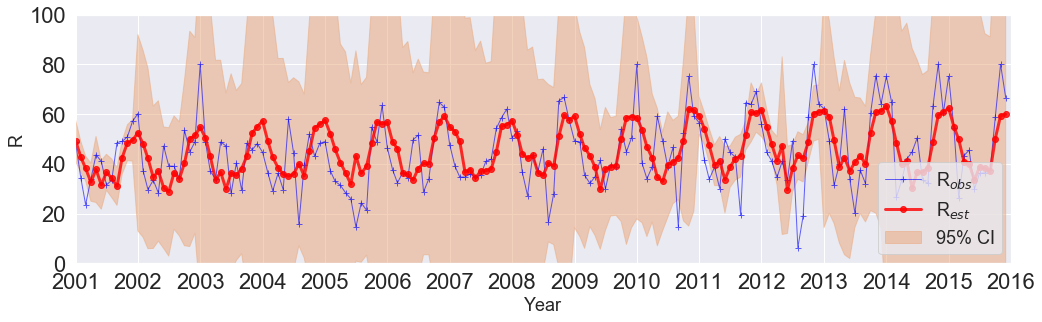

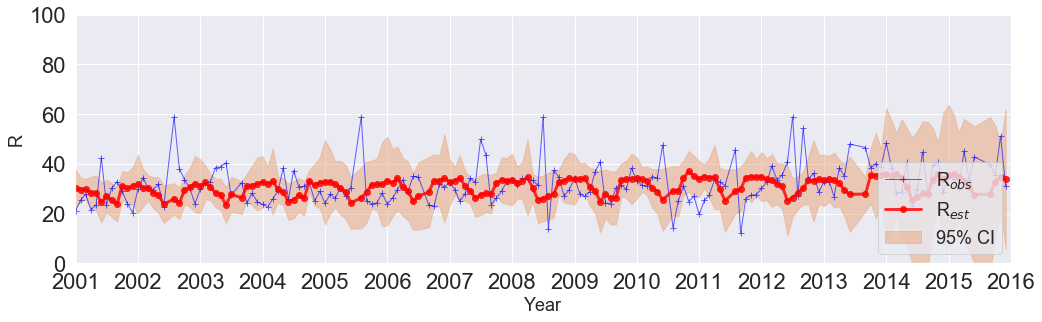

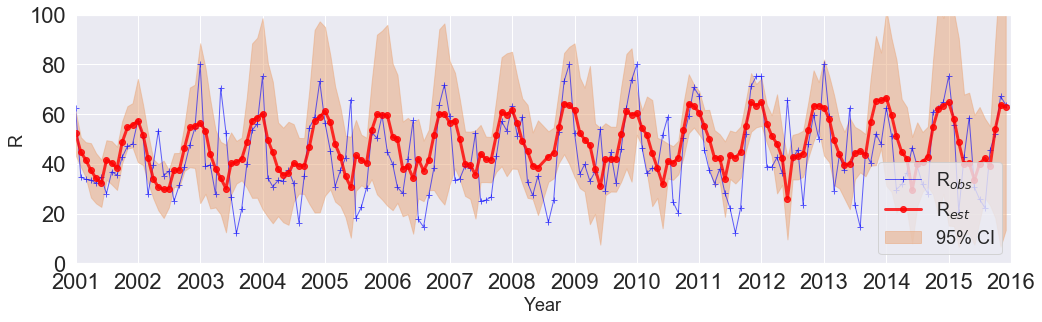

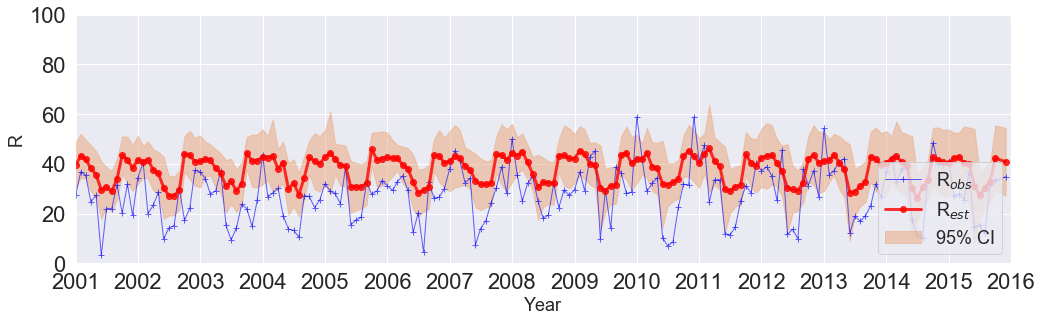

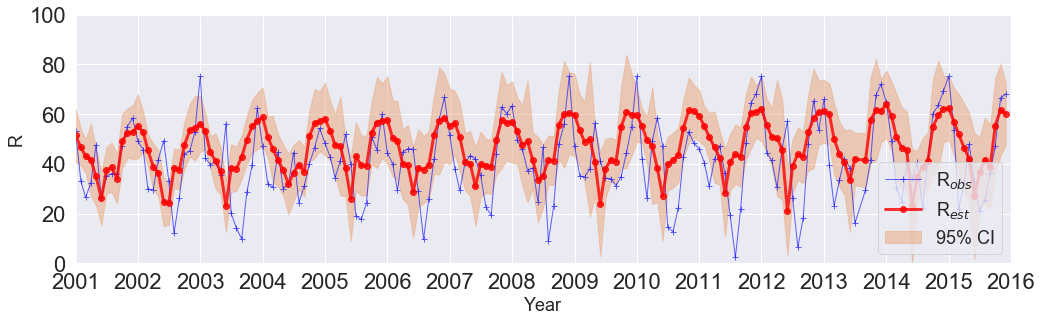

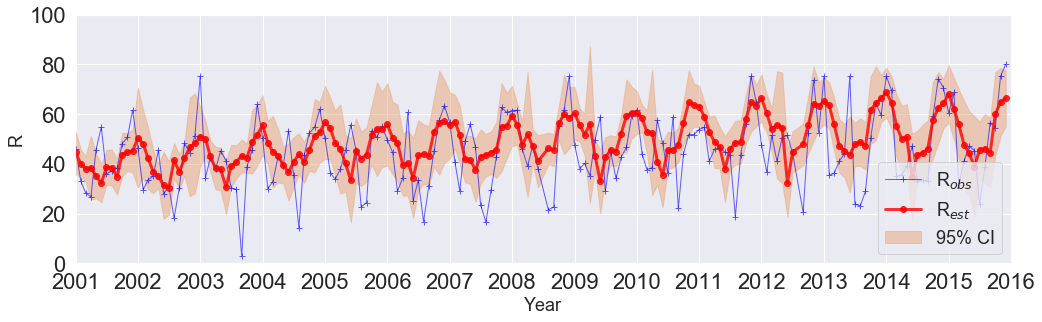

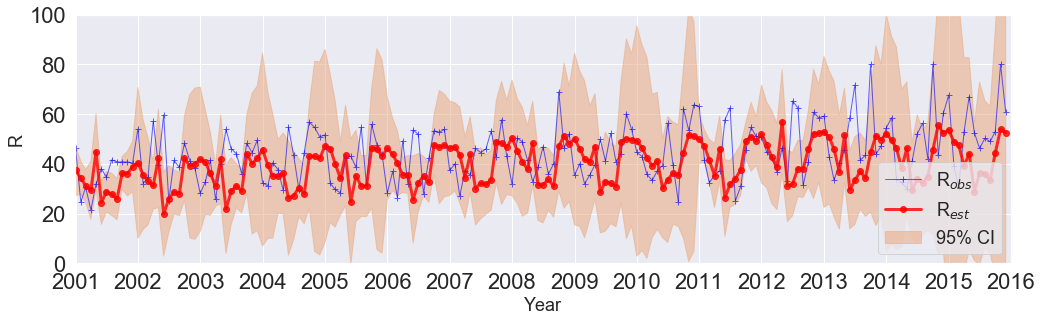

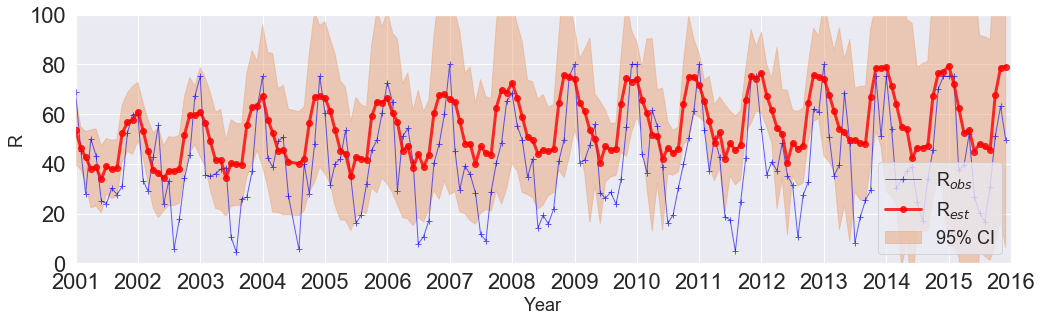

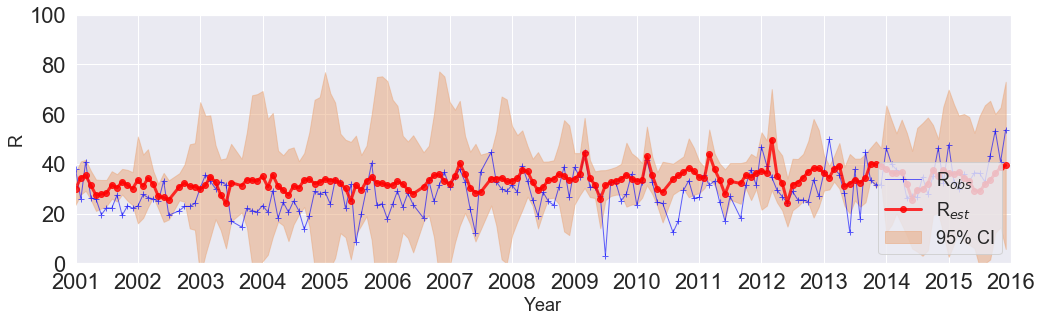

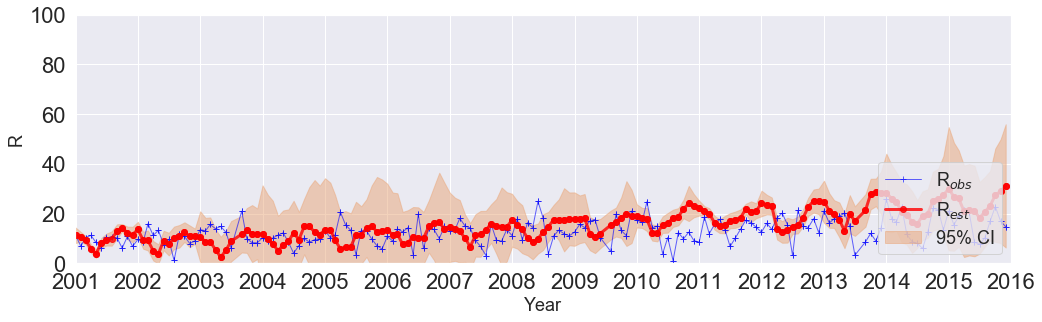

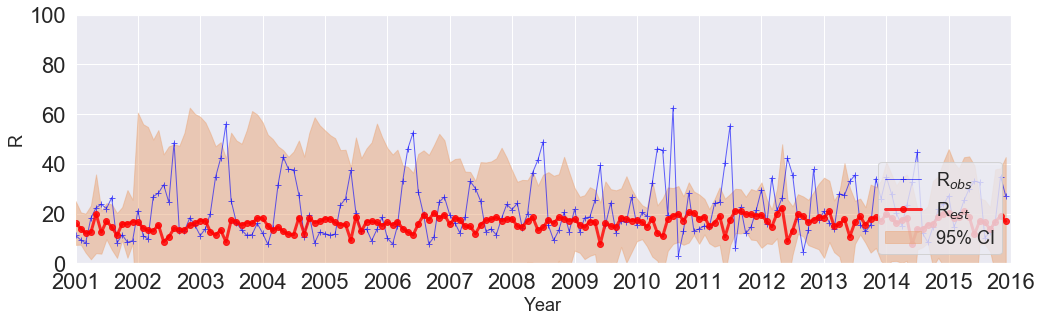

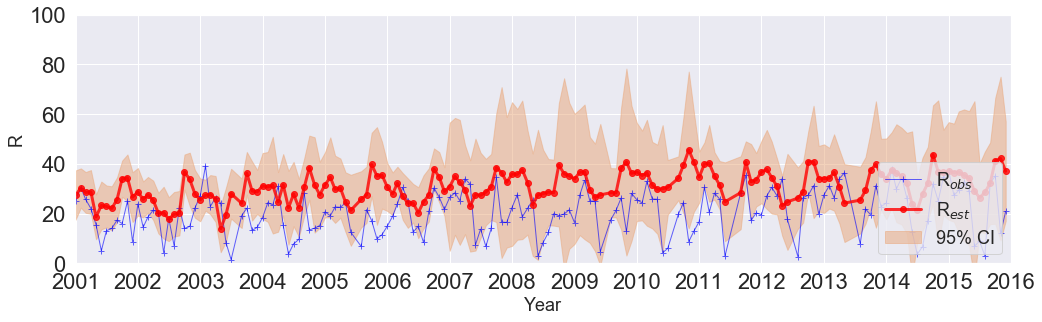

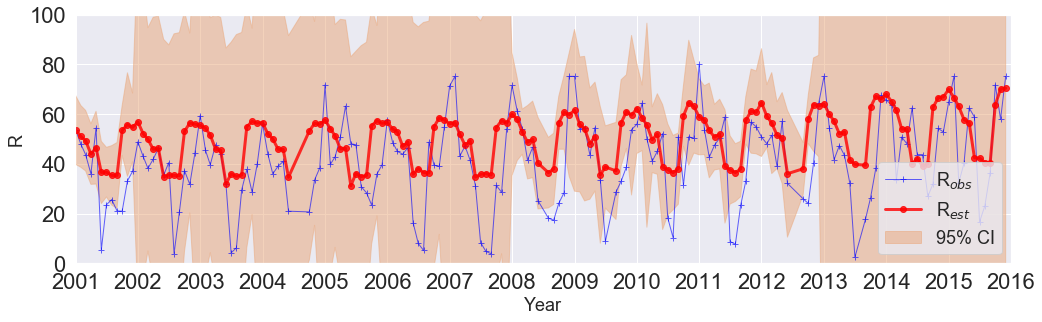

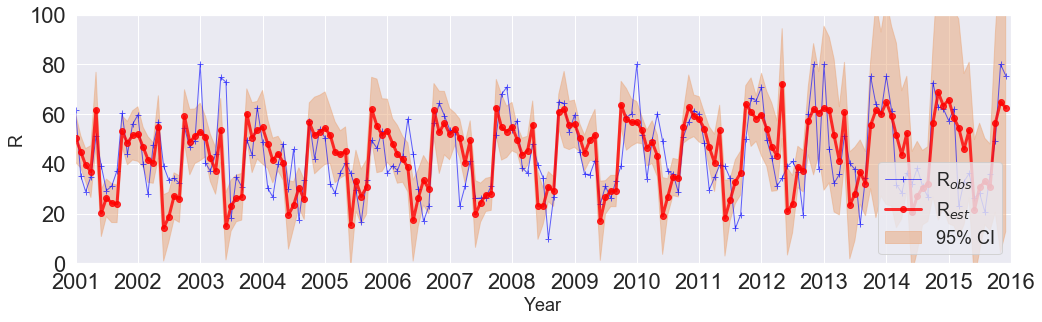

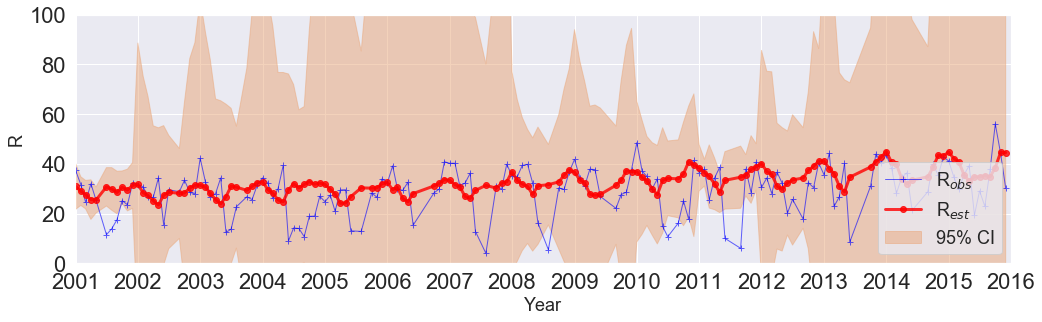

In [17]:
# plot for all the cities Rest, R, CI


citylist = ['Agra', 'Ahmedabad', 'Allahabad', 'Chennai', 'Kanpur', 'Lucknow', 'Ludhiana', 'Patna', 'Raipur', 'Hyderabad', 'Jaipur',             'Bangalore', 'Kolkata', 'NewDelhi', 'Mumbai']

#citylist = ["Amritsar_1"]

# read the all data csv
df_allAY = pd.read_csv(datapath, header = 0)

#correct time index
df_allAY['date'] = pd.to_datetime(df_allAY['date'], format="%Y/%m/%d")
df_allAY = df_allAY.set_index("date")

for city in citylist:
    df_city = df_allAY[df_allAY.city == city]
    
    pathy = os.path.join(currdir,"plots", "AQmodel", "Restimate", "Simple_meteorologySO2_wd_rh_pbl_noR",  "Rest_"+ city + ".png")









    # plot the confidence itnerval along with the Restimated
    
    plotfuncallyear(df_city, pathy)
    #plotfunc(df_city, year=2001)
    #plotfunc(df_city, year=2011)
    #plotmonthly(df_city)

In [46]:
df_allAY.city.unique()

array(['Agra', 'Ahmedabad', 'Allahabad', 'Chennai', 'Kanpur', 'Lucknow',
       'Ludhiana', 'Patna', 'Raipur', 'Hyderabad', 'Jaipur', 'Bangalore',
       'Kolkata', 'NewDelhi', 'Mumbai'], dtype=object)

In [18]:
# get the city wise correaltion and RMSE

datapath = outpath

# read the all data csv
df_allAY = pd.read_csv(datapath, header = 0)

#correct time index
df_allAY['date'] = pd.to_datetime(df_allAY['date'], format="%Y/%m/%d")
df_allAY = df_allAY.set_index("date")

citylist = ['Agra', 'Ahmedabad', 'Allahabad', 'Chennai', 'Kanpur', 'Lucknow', 'Ludhiana', 'Patna', 'Raipur', 'Hyderabad', 'Jaipur', 'Bangalore', 'Kolkata', 'NewDelhi', 'Mumbai']
#citylist = ["Amritsar"]

for city in citylist:
    df_city = df_allAY[df_allAY.city == city]
    print (city, stats.pearsonr(df_city["R"], df_city["R_est"]))
    



Agra (0.6206150846958174, 1.510641695731418e-20)
Ahmedabad (-0.17067886543144917, 0.026060035190236166)
Allahabad (0.5786246028974829, 2.193561555957072e-17)
Chennai (0.6293134485927363, 3.929732543146482e-21)
Kanpur (0.5235388152085061, 5.497405118006128e-14)
Lucknow (0.4963618889888167, 1.841865579739814e-12)
Ludhiana (0.21254685061789466, 0.004175977408163453)
Patna (0.6995614605083946, 1.2479747780268063e-27)
Raipur (0.4521626013704422, 3.770324934819149e-10)
Hyderabad (0.30376665414387904, 5.70327017315875e-09)
Jaipur (-0.33434889623985165, 4.491814364658486e-06)
Bangalore (0.36375783110967036, 1.0060631636811147e-06)
Kolkata (0.6099710361218562, 6.59740657919543e-19)
NewDelhi (0.6255246022465772, 6.155985846295975e-21)
Mumbai (0.2984584318141693, 0.00014663869833194684)


In [113]:
# get the RMSE

# get the city wise correaltion and RMSE

datapath = outpath

# read the all data csv
df_allAY = pd.read_csv(datapath, header = 0)

#correct time index
df_allAY['date'] = pd.to_datetime(df_allAY['date'], format="%Y/%m/%d")
df_allAY = df_allAY.set_index("date")

citylist = ['Agra', 'Ahmedabad', 'Allahabad', 'Chennai', 'Kanpur', 'Lucknow', 'Ludhiana', 'Patna', 'Raipur', 'Hyderabad', 'Jaipur', 'Bangalore', 'Kolkata', 'NewDelhi', 'Mumbai']
#citylist = ["Amritsar"]

for city in citylist:
    df_city = df_allAY[df_allAY.city == city]
    print (city, ((   df_city["R"] - df_city["R_est"]  ) ** 2).mean() ** .5)
    



Agra 13.789233586394035
Ahmedabad 8.853810656315193
Allahabad 12.797475321341
Chennai 11.752743680361213
Kanpur 14.410305934201558
Lucknow 13.250125378887143
Ludhiana 11.211188912726504
Patna 15.88731929577962
Raipur 8.548240569566902
Hyderabad 7.408530665636285
Jaipur 12.228410149153959
Bangalore 13.179075422563816
Kolkata 15.976740432992163
NewDelhi 13.915485154438503
Mumbai 8.774890238924241


In [47]:

# Monthwise RMSE for particular month

for mon in range(1, 13):
    
    #print(mon)
    
    df_allAY12 = df_allAY[df_allAY.index.month==mon]

    ls = []
    citylist = ['Agra', 'Ahmedabad', 'Allahabad', 'Chennai', 'Kanpur', 'Lucknow', 'Ludhiana', 'Patna', 'Raipur', 'Hyderabad', 'Jaipur', 'Bangalore', 'Kolkata', 'NewDelhi', 'Mumbai']
    #citylist = ["Amritsar"]

    for city in citylist:
        df_city = df_allAY12[df_allAY12.city == city]
        print (mon, city, ((   df_city["R"] - df_city["R_est"]  ) ** 2).mean() ** .5)
        ls.append( (city, ((   df_city["R"] - df_city["R_est"]  ) ** 2).mean() ** .5) )
    


1 Agra 11.739409991365239
1 Ahmedabad 7.044026440728048
1 Allahabad 12.370776260134024
1 Chennai 8.663796244028696
1 Kanpur 11.216719359543077
1 Lucknow 10.313699142064793
1 Ludhiana 12.113016191316166
1 Patna 10.364499514481121
1 Raipur 8.381171124136626
1 Hyderabad 6.09024050694125
1 Jaipur 6.534514794205567
1 Bangalore 11.317940022300933
1 Kolkata 10.262349746097106
1 NewDelhi 12.33053185212968
1 Mumbai 6.167348190833423
2 Agra 11.705720356400494
2 Ahmedabad 5.585604249261101
2 Allahabad 12.204793926291323
2 Chennai 8.490316422244598
2 Kanpur 14.082966034742745
2 Lucknow 15.163225532820979
2 Ludhiana 9.995051378416344
2 Patna 18.107337190266673
2 Raipur 6.504227609162648
2 Hyderabad 5.165702724090503
2 Jaipur 6.768359664425986
2 Bangalore 9.400746309245935
2 Kolkata 8.80576960338621
2 NewDelhi 10.817209685892443
2 Mumbai 4.882247775909818
3 Agra 17.219734324677482
3 Ahmedabad 6.062946628882862
3 Allahabad 17.626735259676035
3 Chennai 14.044356010101078
3 Kanpur 21.97594879057303
3 L

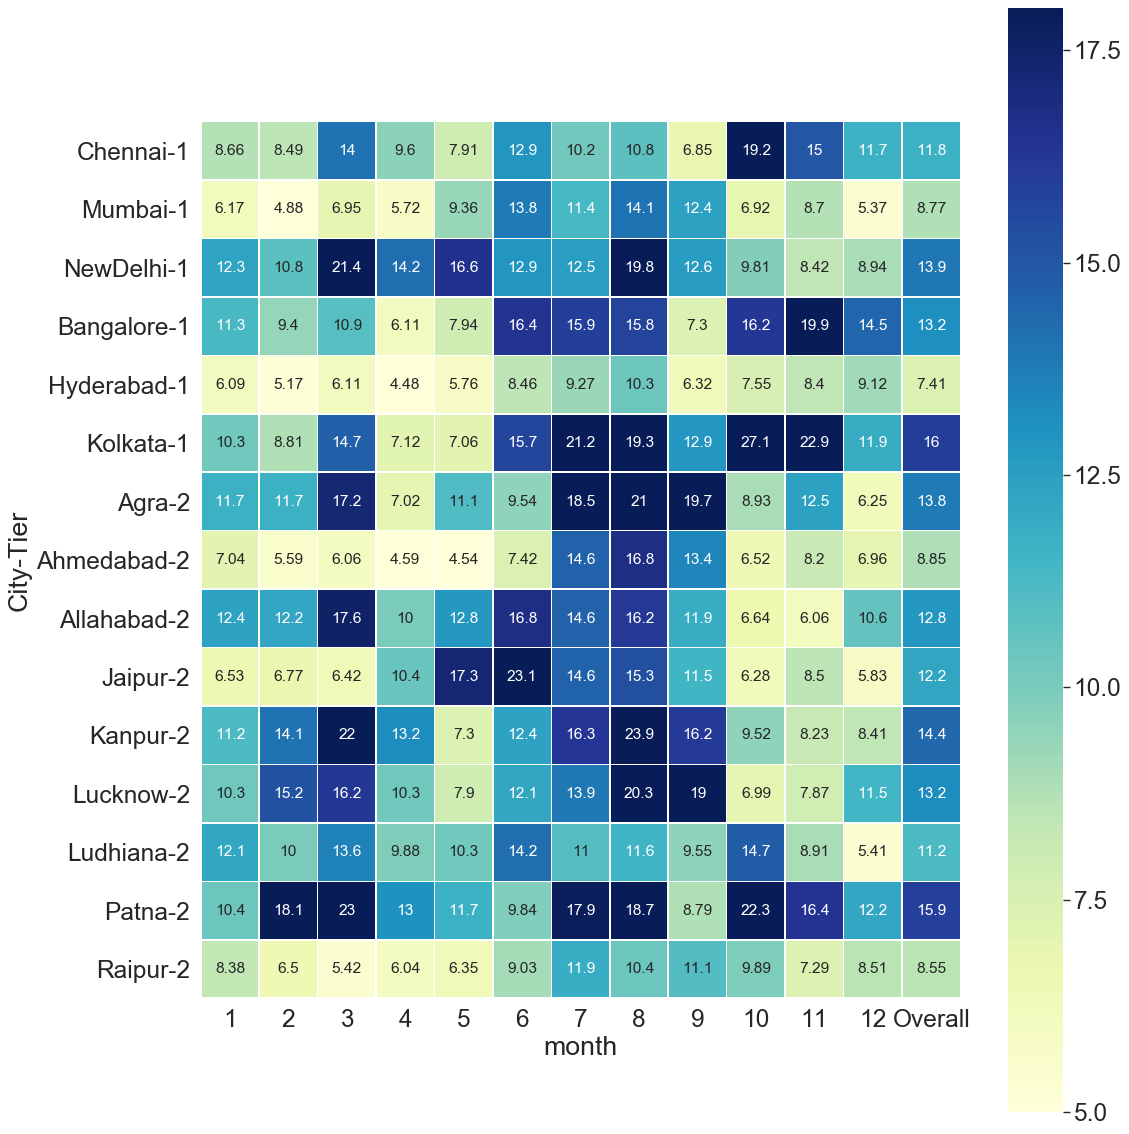

In [118]:
# plot as heatmap

import numpy as np 
from pandas import DataFrame
import seaborn as sns
%matplotlib inline

Index= ['aaa', 'bbb', 'ccc', 'ddd', 'eee']
Cols = ['A', 'B', 'C', 'D']
df = DataFrame(abs(np.random.randn(5, 4)), index=Index, columns=Cols)

df = pd.read_csv(r"C:\Users\Prakhar\Desktop\Final paper files\wndle0\monthlyRMSE.csv", header = 0)
df = df.set_index(df.city)
df = df.drop(["city"], axis =1)

sns.set(font_scale=2)
fig=plt.figure(figsize=(15, 15), dpi= 80, facecolor='w', edgecolor='k')
sns_plot = sns.heatmap(df, cmap='YlGnBu', linewidths=0.5, annot=True, vmin=5, vmax=18, fmt=".3g", square = True, annot_kws={"size": 14}, xticklabels = True)
sns_plot.set(xlabel='month', ylabel='City-Tier')
plt.tight_layout()
sns_plot.get_figure().savefig(r".\\Plots\AQmodel\RMSE\RMSE_wndLE0rhpblh.png")

In [64]:
df.drop(["city"], axis =1)

,1,2,3,4,5,6,7,8,9,10,11,12,Overall
city,,,,,,,,,,,,,
Agra,11.739410,11.705720,17.219734,7.020057,11.113814,9.541928,18.519340,20.977987,19.738492,8.929138,12.453066,6.249310,13.789234
Ahmedabad,7.044026,5.585604,6.062947,4.588093,4.535661,7.420524,14.641345,16.792447,13.438010,6.519344,8.197316,6.961804,8.853811
Allahabad,12.370776,12.204794,17.626735,10.006668,12.809194,16.757070,14.628912,16.191016,11.921246,6.640067,6.062155,10.575423,12.797475
Bangalore,11.317940,9.400746,10.906531,6.105899,7.942017,16.431041,15.933372,15.791049,7.296323,16.247004,19.914278,14.483412,11.752744
Chennai,8.663796,8.490316,14.044356,9.600968,7.909204,12.914369,10.199017,10.750504,6.848613,19.219343,15.022274,11.657849,14.410306
Hyderabad,6.090241,5.165703,6.106843,4.479553,5.763440,8.463571,9.266861,10.339133,6.319208,7.545227,8.403372,9.117771,13.250125
Jaipur,6.534515,6.768360,6.415950,10.440687,17.252430,23.076840,14.554566,15.335383,11.525801,6.284996,8.495344,5.832053,11.211189
Kanpur,11.216719,14.082966,21.975949,13.242904,7.296742,12.401791,16.280895,23.898352,16.164652,9.521948,8.229651,8.409330,15.887319
Kolkata,10.262350,8.805770,14.651357,7.116782,7.056733,15.665885,21.169630,19.320755,12.866219,27.055046,22.860464,11.924880,8.548241
